## Large area utilities

The `sentinelhub` package contains special utilities for working with large geographical areas.

#### Imports

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import os.path
from shapely.geometry import shape, Polygon, MultiPolygon

from sentinelhub.areas import BBoxSplitter
from sentinelhub import read_data, CRS, transform_bbox

The following packages are not included in `sentinelhub` however they are used in this examples for visualization.

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as plt_polygon

from mpl_toolkits.basemap import Basemap

Cies Islands

In [4]:
INPUT_FOLDER = '../tests/TestInputs'
INPUT_FILE = os.path.join(INPUT_FOLDER, 'cies_islands.json')

In [5]:
geo_json = read_data(INPUT_FILE)
large_area = shape(geo_json)

splitter = BBoxSplitter([large_area], CRS.WGS84, 5, reduce_bbox_sizes=True)
bbox_list = splitter.get_bbox_list()

/home/matej/Sinergise/sentinelhub-py/sentinelhub/common.py:56: UserWarning: Since sentinelhub version 2.0.0 the order of coordinates for BBox in CRS.WGS84 has been reversed from latitide-longitude to longitude-latitude. Please make sure to initialize bounding box with BBox([lng_1, lat_1, lng_2, lat_2], CRS.WGS84). The order of coordinates in other coordinate reference systems has not changed.
  warnings.warn(message)


In [12]:
def show_splitter(splitter, alpha=0.2, area_buffer=0.2, show_legend=False):
    area_bbox = splitter.get_area_bbox()
    minx, miny, maxx, maxy = area_bbox
    lng, lat = area_bbox.get_middle()
    w, h = maxx - minx, maxy - miny
    minx = minx - area_buffer * w
    miny = miny - area_buffer * h
    maxx = maxx + area_buffer * w
    maxy = maxy + area_buffer * h
    
    fig=plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
     
    base_map = Basemap(projection='mill', lat_0=lat, lon_0=lng, llcrnrlon=minx, llcrnrlat=miny,
                       urcrnrlon=maxx, urcrnrlat=maxy, resolution='l', epsg=4326)
    base_map.drawcoastlines()
    
    area_shape = splitter.get_area_shape()
    if isinstance(area_shape, Polygon):
        area_shape = [area_shape]
    for polygon in area_shape:
        ax.add_patch(plt_polygon(np.array(polygon.boundary), closed=True, facecolor=(0, 0, 0, 0), edgecolor='red'))
    
    bbox_list = splitter.get_bbox_list()
    info_list = splitter.get_info_list()
    
    cm = plt.get_cmap('jet', len(bbox_list))
    legend_shapes = []
    for i, (bbox, info) in enumerate(zip(bbox_list, info_list)):
        wgs84_bbox = transform_bbox(bbox, CRS.WGS84).get_polygon()

        tile_color = tuple(list(cm(i))[:3] + [alpha])
        ax.add_patch(plt_polygon(np.array(wgs84_bbox), closed=True, facecolor=tile_color, edgecolor='green'))
        
        if show_legend:
            legend_shapes.append(plt.Rectangle((0,0),1,1, fc=cm(i)))
    
    if show_legend:
        plt.legend(legend_shapes, ['{},{}'.format(info['index_x'], info['index_y']) for info in info_list])
    plt.tight_layout()
    plt.show()

In [9]:
geojson = read_data(INPUT_FILE)

area = shape(geojson)

splitter = BBoxSplitter([area], CRS.WGS84, (5, 12), reduce_bbox_sizes=True)
bbox_list = splitter.get_bbox_list()

/home/matej/Sinergise/sentinelhub-py/sentinelhub/common.py:56: UserWarning: Since sentinelhub version 2.0.0 the order of coordinates for BBox in CRS.WGS84 has been reversed from latitide-longitude to longitude-latitude. Please make sure to initialize bounding box with BBox([lng_1, lat_1, lng_2, lat_2], CRS.WGS84). The order of coordinates in other coordinate reference systems has not changed.
  warnings.warn(message)


/home/matej/Sinergise/sentinelhub-py/sentinelhub/common.py:56: UserWarning: Since sentinelhub version 2.0.0 the order of coordinates for BBox in CRS.WGS84 has been reversed from latitide-longitude to longitude-latitude. Please make sure to initialize bounding box with BBox([lng_1, lat_1, lng_2, lat_2], CRS.WGS84). The order of coordinates in other coordinate reference systems has not changed.
  warnings.warn(message)


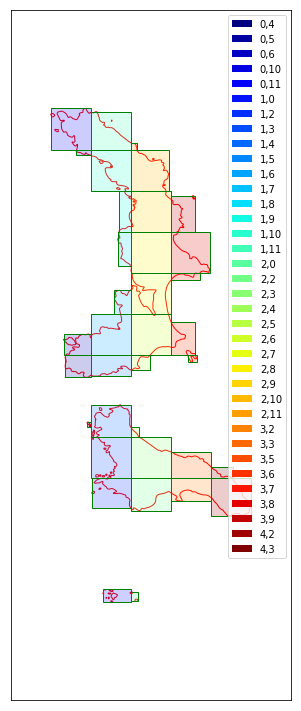

In [13]:
show_splitter(splitter, show_legend=True)